In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# TRAINING DATA (100)
# 4,436,445 tokens
# 342,006 vocab items
# 13.0 tokens/vocab


file={
#     "ordered_train(90_o)_test(10_i)_a0.1": ['LM_n3_(hungarian_90_gutenberg)_a0.1_OI_train(90)_test(10).txt'],
#     "ordered_train(90_o)_test(10_i)_a0.5": ['LM_n3_(hungarian_90_gutenberg)_a0.5_OI_train(90)_test(10).txt'],
    "ordered_train(90_o)_test(10_i)_a0.01": ['LM_n3_(hungarian_90_gutenberg)_a0.01_OI_train(90)_test(10).txt'],
    "ordered_train(90_o)_test(10_i)_a0.001": ['LM_n3_(hungarian_90_gutenberg)_a0.001_OI_train(90)_test(10).txt'],
    "ordered_train(90_o)_test(10_i)_a0.0001": ['LM_n3_(hungarian_90_gutenberg)_a0.0001_OI_train(90)_test(10).txt'],
    "random_train(90_o)_test(10_i)_a0.01": ['LM_n3_(hungarian_90_gutenberg)_a0.01_R_train(90_o)_test(10_i).txt'],
    "random_train(90_o)_test(10_i)_a0.001": ['LM_n3_(hungarian_90_gutenberg)_a0.001_R_train(90_o)_test(10_i).txt'],
    "random_train(90_o)_test(10_i)_a0.0001": ['LM_n3_(hungarian_90_gutenberg)_a0.0001_R_train(90_o)_test(10_i).txt'],
    
}

df_all = pd.DataFrame(columns=['name','window_size', 'perplexity','prob_words','h_words', 'h_wordset', 'h_wordorder', 'entropy_rate', 'unordered_entropy_rate', 'entropy_rate_difference','zeros_permutations'])
c = 0
for k,v in file.items():
    df = pd.read_csv(file[k][0])
#     if k[len(k)-2:len(k)-1] == str(4):
#         df['word_count'] = pd.Series([576673,576673,576673,576673,576673])
#     elif k[len(k)-3:len(k)-1] == str(10):
#         df['word_count'] = pd.Series([1313930,1313930,1313930,1313930,1313930])
#     elif k[len(k)-3:len(k)-1] == str(50):
#         df['word_count'] = pd.Series([6407228,6407228,6407228,6407228,6407228])
#     else:
#         df['word_count'] = pd.Series([0,0,0,0,0])
    
    df['prob_words'] = pd.Series(2**(-df['h_words']))
    df['window_size'] =  pd.Series([1,2,3,4,5])
    df['name'] = pd.Series([k,k,k,k,k])
    df['h_wordorder'] = pd.Series(df['h_words'] - df['h_wordset'])
    df['entropy_rate'] = pd.Series(df['h_words'] / df['window_size'])
    df['perplexity'] = pd.Series(2**df['entropy_rate'])
    df['unordered_entropy_rate'] = pd.Series(df['h_wordset'] / df['window_size'])
    df['entropy_rate_difference'] = pd.Series((df['h_words'] - df['h_wordset']) / df['window_size'])
#     df['perplexity'] = pd.Series(df['prob_words']**(-1/df['word_count']))
    del df['Unnamed: 0']
    for i in range(5):
        df_all.loc[5*c + i] = df.loc[i]
#     if c == 0:
#         print(df)
    c+=1

# df_all[df_all['name'] == ('oi_a0.1')]
df_all


,name,window_size,perplexity,prob_words,h_words,h_wordset,h_wordorder,entropy_rate,unordered_entropy_rate,entropy_rate_difference,zeros_permutations
0,ordered_train(90_o)_test(10_i)_a0.01,1,376.520321,2.655899e-03,8.556584,8.556584,0.000000,8.556584,8.556584,0.000000,NaN
1,ordered_train(90_o)_test(10_i)_a0.01,2,206.266844,2.350397e-05,15.376736,14.967418,0.409319,7.688368,7.483709,0.204659,NaN
2,ordered_train(90_o)_test(10_i)_a0.01,3,196.828920,1.311394e-07,22.862395,21.824642,1.037753,7.620798,7.274881,0.345918,NaN
3,ordered_train(90_o)_test(10_i)_a0.01,4,191.118033,7.495374e-10,30.313280,28.975678,1.337603,7.578320,7.243919,0.334401,NaN
4,ordered_train(90_o)_test(10_i)_a0.01,5,186.238552,4.463259e-12,37.705040,36.147332,1.557707,7.541008,7.229466,0.311541,NaN
5,ordered_train(90_o)_test(10_i)_a0.001,1,377.092080,2.651872e-03,8.558773,8.558773,0.000000,8.558773,8.558773,0.000000,NaN
6,ordered_train(90_o)_test(10_i)_a0.001,2,140.298243,5.080372e-05,14.264706,14.073444,0.191262,7.132353,7.036722,0.095631,NaN
7,ordered_train(90_o)_test(10_i)_a0.001,3,95.401676,1.151680e-06,19.727828,19.301077,0.426751,6.575943,6.433692,0.142250,NaN
8,ordered_train(90_o)_test(10_i)_a0.001,4,77.980973,2.704241e-08,25.140201,24.549384,0.590817,6.285050,6.137346,0.147704,NaN
9,ordered_train(90_o)_test(10_i)_a0.001,5,68.579798,6.592027e-10,30.498559,29.768354,0.730205,6.099712,5.953671,0.146041,NaN


[]

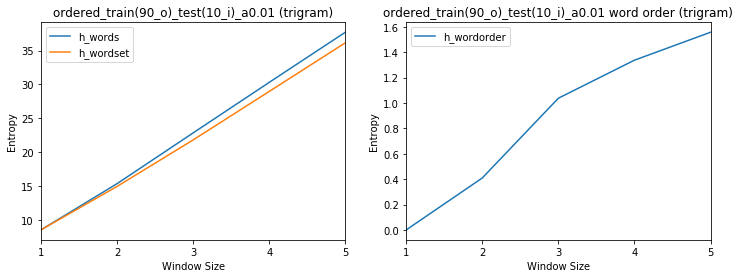

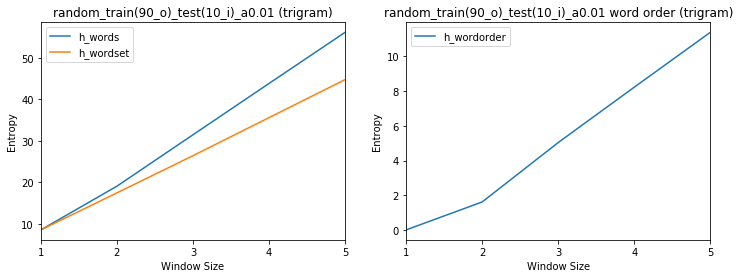

In [24]:
# Compare h_words/h_wordset and word order
name = "ordered_train(90_o)_test(10_i)_a0.01"
# name = "(leipzig)ordered_lemmatized_train(90_o)_test(10_i)_a0.1"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = "random_train(90_o)_test(10_i)_a0.01"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

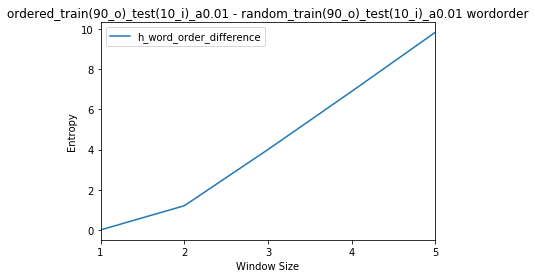

In [20]:
# Compare ordered and random wordorder difference

df = pd.DataFrame()
df['window_size'] = [1,2,3,4,5]
name1 = "ordered_train(90_o)_test(10_i)_a0.01"
df1 = df_all[df_all['name'] == name1].copy().reset_index(drop=True)

name2 = "random_train(90_o)_test(10_i)_a0.01"
df2 = df_all[df_all['name'] == name2].copy().reset_index(drop=True)

df['h_word_order_difference'] = df2['h_wordorder'] - df1['h_wordorder']
# df['h_word_order_difference'] = df1['h_wordorder'] - df2['h_wordorder']

# axis = df.plot(x="window_size", y=['h_word_order_difference'], title=name2 + " - " + name1 +" wordorder")
axis = df.plot(x="window_size", y=['h_word_order_difference'], title=name1 + " - " + name2 +" wordorder")
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

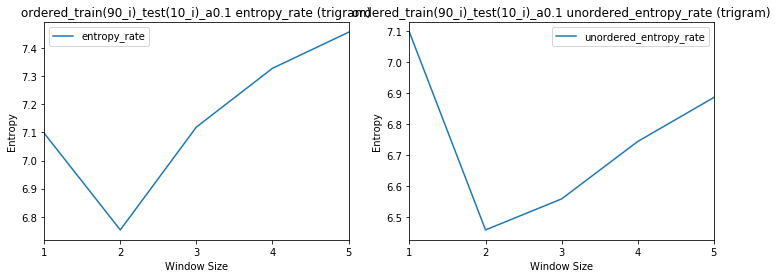

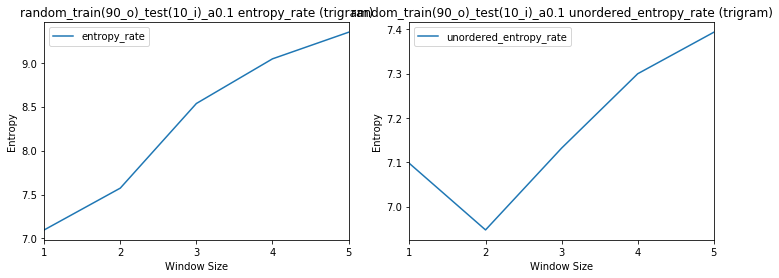

In [13]:
# Compare ordered and unordered entropy rates for random and ordered LM
# as window_size increases, on average there is more entropy per word (LESS INFORMATION)

base = 'i_a0.1_90_10'

name = "ordered_train(90_i)_test(10_i)_a0.1"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate"], title=name+" entropy_rate (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['unordered_entropy_rate'], title=name+" unordered_entropy_rate (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = "random_train(90_o)_test(10_i)_a0.1"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate"], title=name+" entropy_rate (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['unordered_entropy_rate'], title=name+" unordered_entropy_rate (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

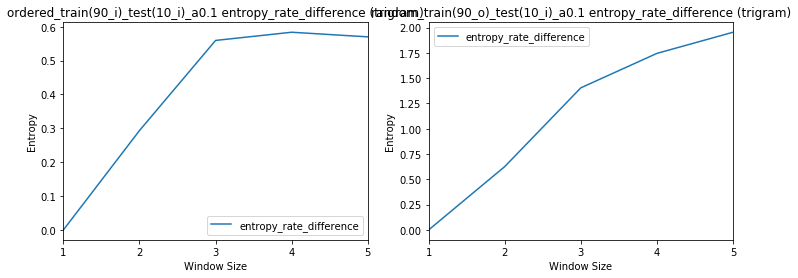

In [14]:
# Compare ordered and unordered entropy rates for random and ordered LM


name = "ordered_train(90_i)_test(10_i)_a0.1"
df = df_all[df_all['name'] == name].copy()

name2 = "random_train(90_o)_test(10_i)_a0.1"
df2 = df_all[df_all['name'] == name2].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate_difference"], title=name+" entropy_rate_difference (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df2.plot(x="window_size", y=['entropy_rate_difference'], title=name2+" entropy_rate_difference (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()


[]

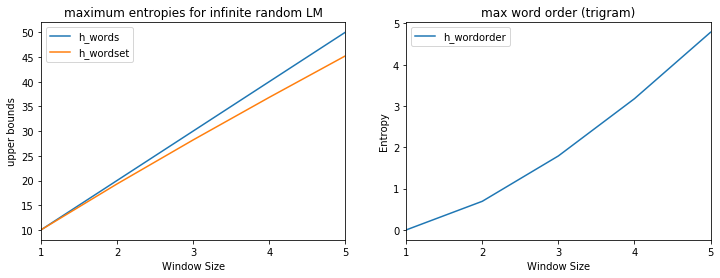

In [11]:
# Get entropy upper bounds given an infinite random LM

import scipy.special

df = pd.DataFrame()
df['window_size'] = [1,2,3,4,5]
df['upper_bounds'] = [0, 1, 2.584962500721156, 4.584962500721156,  6.906890595608519]
# df['h_words'] = 9.781669 * df['window_size'] 
df['h_words'] = 10.001012 * df['window_size'] 
df['h_wordset'] = df['h_words'] - np.log(scipy.special.factorial(df['window_size']))
df['exponential'] = [1,2,6,24,120]
df['h_wordorder'] = df["h_words"] - df['h_wordset']

fig, ax = plt.subplots(ncols=2,figsize=(12,4))

a = df.plot(x="window_size", y=['h_words', 'h_wordset'], title="maximum entropies for infinite random LM", ax=ax[0])
a.set(xlabel="Window Size", ylabel="upper bounds")
a.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title="max word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()